In [1]:
import sys
sys.path.append("..")
from IPython.display import display

In [2]:
import numpy as np
import logging
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import importlib 
plt.rcParams["figure.figsize"] = (8,8)

In [3]:
from scripts import reclusterTree
from scripts import linkageList
from scripts import heatClustermap
from scripts import Tree1D

In [4]:
# Reload filles after changes
importlib.reload(reclusterTree)
importlib.reload(linkageList)
importlib.reload(heatClustermap)

<module 'scripts.heatClustermap' from '/Users/sebastian/Dropbox/Documents/Physics_projects/simulator/VisualizeBinaryTrees/scripts/heatClustermap.py'>

# HEAT CLUSTERMAP VISUALIZATIONS

Given a tree structure, this notebook gets heat clustermap visualizations of it. In particular, given a jet (the set of its constituents), visualization for the different trees obtained with each clustering algorithm (and the truth tree) are displayed. 

There are 2 functions for visualization:

a) function heat_dendrogram: Create  a heat dendrogram clustermap. If two jets are given as input:
- 1) If only one jet is given as input, both rows and columns are ordered according to that jet tree.
- 2) If truthJet and recluster_jet1, the visualization shows the heat data map of the truth jet, with columns ordered according to the truth jet and rows according to recluster_jet1.
- 3) If recluster_jet1 and recluster_jet2, the visualization shows the heat data map of recluster_jet1, with columns ordered according to the recluster_jet1 and rows according to recluster_jet2.
    
b) function dendrogramDiff:
    Given two jet algorithms heat data matrices, we reorder the heat matrices according to the truth jet order (order in which leaves are accessed when traversing the truth tree) and take the difference.
    
Both functions have the same arguments:
- truthJet: Truth jet dictionary
- recluster_jet1: reclustered jet 1
- recluster_jet2: reclustered jet 2
- full_path: Bool. If True, then use the total number of steps to connect a pair of leaves as the heat data. If False, then Given a pair of jet constituents {i,j} and the number of steps needed for each constituent to reach their closest common ancestor {Si,Sj}, the heat map scale represents the maximum number of steps, i.e. max{Si,Sj}.
- FigName: Dir and location to save a plot.
    
 
Usage:
- Input_dir: select the directory with the jets dictionaries.
- Input_jet: select the jet filename for the visualizations.
- Optional: input a name and location to save an image as the "outFilename" argument of the "heat_dendrogram" or "dendrogramDiff" functions.


Note: The length of the connections among nodes for dendrogram diagrams shown at the sides of the clustermaps, is given by:
- The distance measure d_ij between nodes, for the (Kt, CA, Antikt} algorithms 
- An integer starting at 0 and increasing by one each time a node is added, for the truth case. 

In [5]:
# Filename and dir  to save a plot
# outFilename="plots/heatClustermap/figTruthTruth_singlepath_jet2.jpg"

In [6]:
#Data dir
input_dir= 'data/'
# input_dir ="../ToyJetsShower/data/"

In [7]:
# nput_jet = 'tree_13_truth'
input_jet = 'tree_10_truth'

In [8]:
with open(input_dir+ str(input_jet) + '.pkl', "rb") as fd: 
    truth_jet = pickle.load(fd, encoding='latin-1')[0]

jet_name = ('_').join(input_jet.split('_')[-3:-1])
truth_jet["name"]=jet_name
truth_jet["algorithm"]="truth"

display(truth_jet["name"])

'tree_10'

In [9]:
# Number of jet constituents
linkageList.runTraverse_jet(truth_jet, draw_tree=True)
len(truth_jet["outers_list"])

57

In [10]:
# Recluster jet
recluster = True
if recluster:
    reclusterKt = reclusterTree.recluster(truth_jet, alpha=1)
    reclusterAntikt = reclusterTree.recluster(truth_jet, alpha=-1)
    reclusterCA = reclusterTree.recluster(truth_jet, alpha=0)
    
# Note: The variable alpha determines the clustering algorithm, with {1,0,-1} for the {Kt, CA, Antikt} algorithms respectively

2019-08-05 12:18:08,271:INFO::Output jet filename = data/tree_10_1.pkl
2019-08-05 12:18:29,253:INFO::Output jet filename = data/tree_10_-1.pkl
2019-08-05 12:18:48,565:INFO::Output jet filename = data/tree_10_0.pkl


In [11]:
# Load reclustered jets
with open(input_dir+ str(truth_jet["name"])+'_1' + '.pkl', "rb") as fd: reclusterKt = pickle.load(fd, encoding='latin-1')
with open(input_dir+ str(truth_jet["name"])+'_-1' + '.pkl', "rb") as fd: reclusterAntikt = pickle.load(fd, encoding='latin-1')
with open(input_dir+ str(truth_jet["name"])+'_0' + '.pkl', "rb") as fd: reclusterCA = pickle.load(fd, encoding='latin-1')

## SAME TREE BOTH IN ROWS AND COLUMNS

2019-08-05 12:58:21,622:INFO::truth heat data ----  alpha row: truth -- alpha column: truth


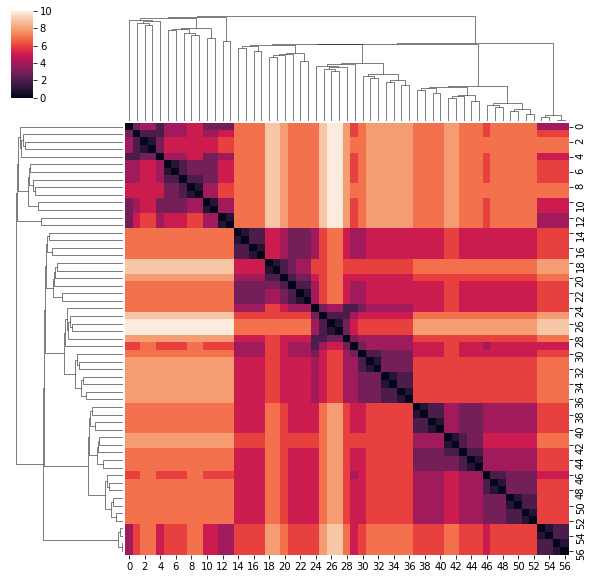

In [33]:
heatClustermap.heat_dendrogram(
    truthJet=truth_jet,
    full_path=False, 
    FigName=None)

2019-08-05 12:19:09,351:INFO::alpha row: 1 -- alpha column: 1


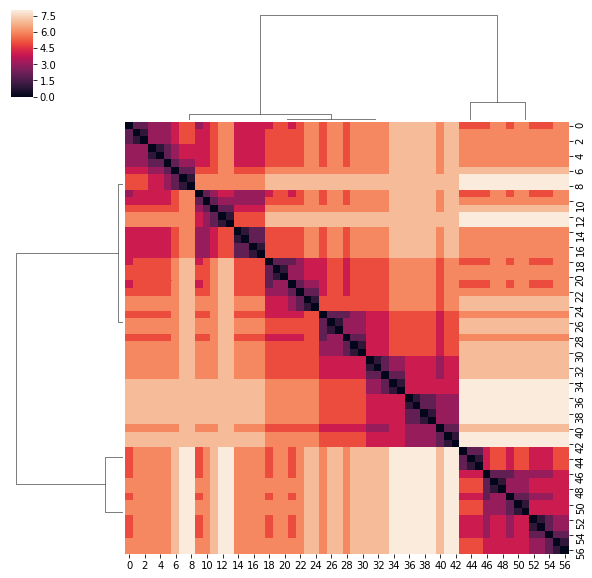

In [13]:
heatClustermap.heat_dendrogram(
    recluster_jet1=reclusterKt,
    full_path=False, 
    FigName=None)

2019-08-05 12:19:29,449:INFO::alpha row: 0 -- alpha column: 0


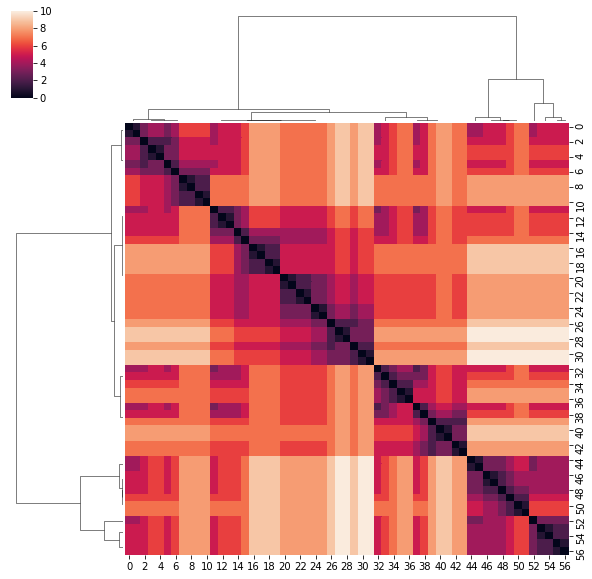

In [14]:
heatClustermap.heat_dendrogram(
    recluster_jet1=reclusterCA,
    full_path=False, 
    FigName=None)

2019-08-05 12:58:20,050:INFO::alpha row: -1 -- alpha column: -1


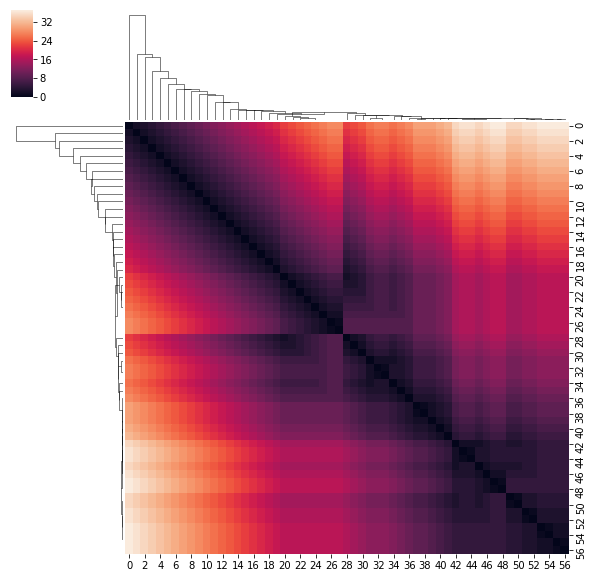

In [32]:
heatClustermap.heat_dendrogram(
    recluster_jet1=reclusterAntikt,
    full_path=False, 
    FigName=None)

## DIFFERENT TREE IN ROWS AND COLUMNS

2019-08-05 12:19:50,373:INFO::alpha row: 1 -- alpha column: truth


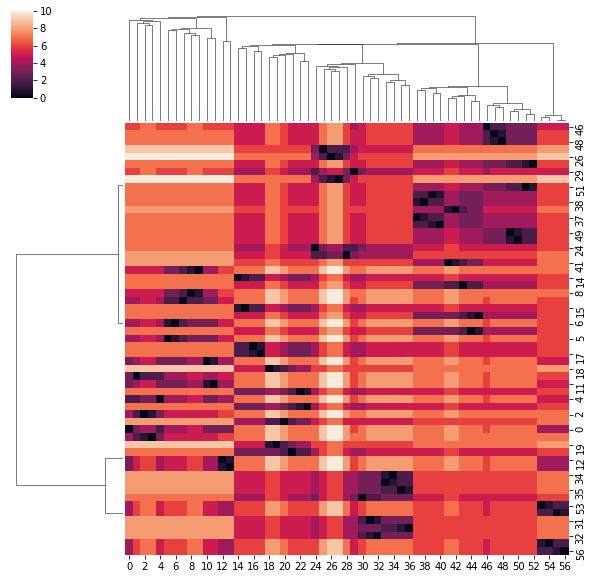

In [16]:
heatClustermap.heat_dendrogram(
    truthJet=truth_jet,
    recluster_jet1 = reclusterKt, 
    full_path=False, 
    FigName=None)

2019-08-05 12:19:51,177:INFO::alpha row: 0 -- alpha column: truth


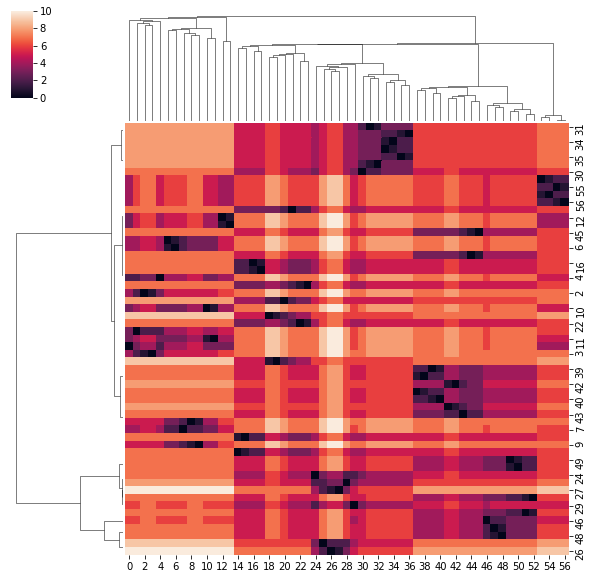

In [17]:
heatClustermap.heat_dendrogram(
    truthJet=truth_jet,
    recluster_jet1 = reclusterCA, 
    full_path=False, 
    FigName=None)

2019-08-05 12:19:51,988:INFO::alpha row: -1 -- alpha column: truth


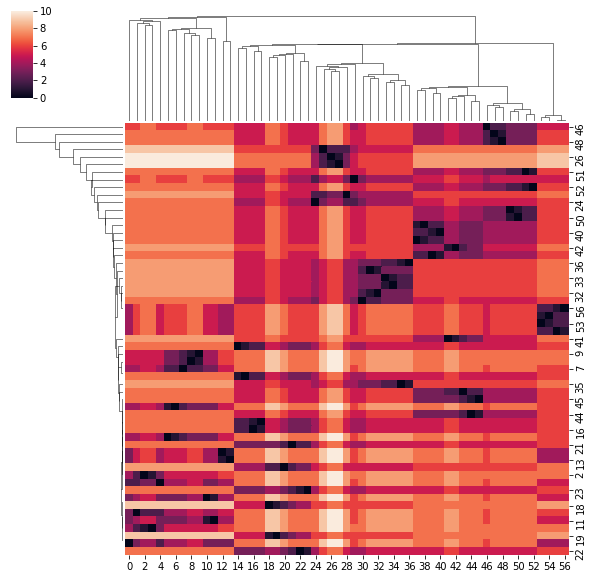

In [18]:
heatClustermap.heat_dendrogram(
    truthJet=truth_jet,
    recluster_jet1 = reclusterAntikt, 
    full_path=False, 
    FigName=None)

2019-08-05 12:39:07,931:INFO::alpha row: 0 -- alpha column: 1


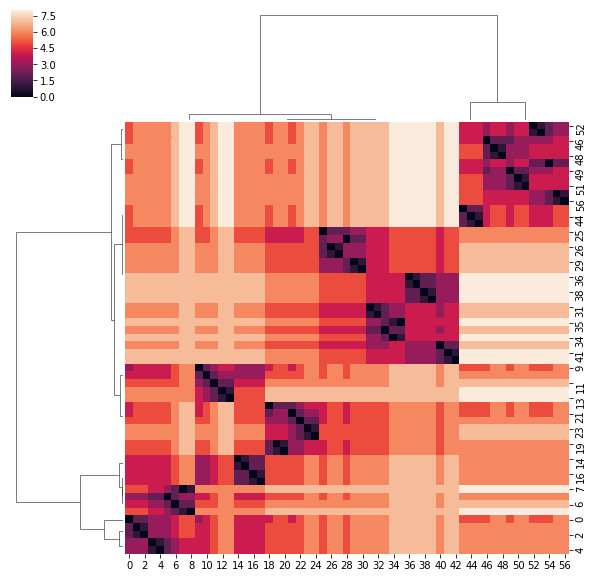

In [26]:
heatClustermap.heat_dendrogram(
    recluster_jet1 = reclusterKt, 
    recluster_jet2 = reclusterCA,
    full_path=False, 
    FigName=None)

2019-08-05 12:20:31,325:INFO::alpha row: 1 -- alpha column: -1


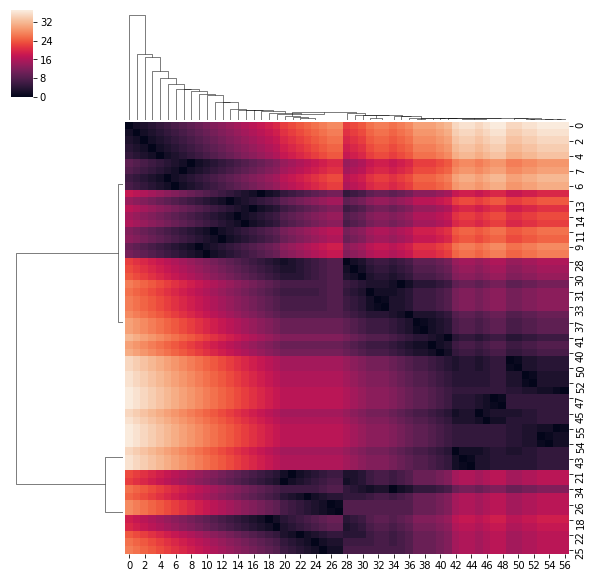

In [19]:
heatClustermap.heat_dendrogram(
    recluster_jet1 = reclusterAntikt, 
    recluster_jet2 = reclusterKt,
    full_path=False, 
    FigName=None)

## DENDROGRAM DIFFERENCES

Given two jet algorithms heat data matrices, we reorder the heat matrices according to the truth jet order (order in which leaves are accessed when traversing the truth tree) and take the difference. Values close to cero mean that the trees substructe is closer between trees.

2019-08-05 12:57:39,486:INFO::(Truth jet - recluster jet1) heat data


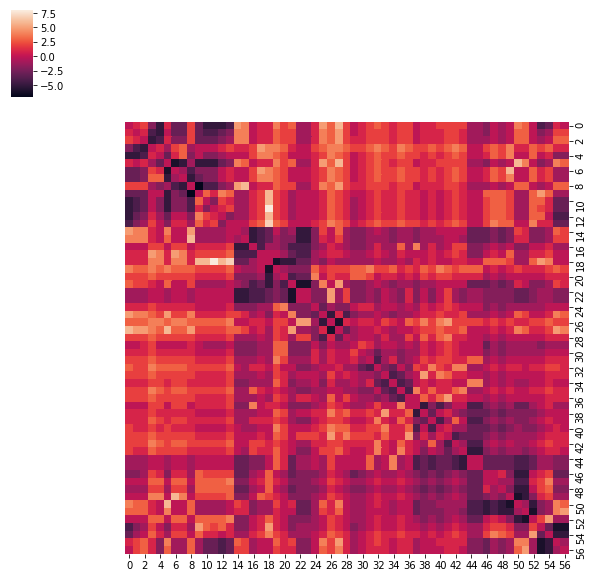

In [31]:
heatClustermap.dendrogramDiff(
    truthJet=truth_jet,
    recluster_jet1=reclusterKt,
    full_path=False, 
    FigName=None)

2019-08-05 12:20:32,977:INFO::(Truth jet - recluster jet1) heat data


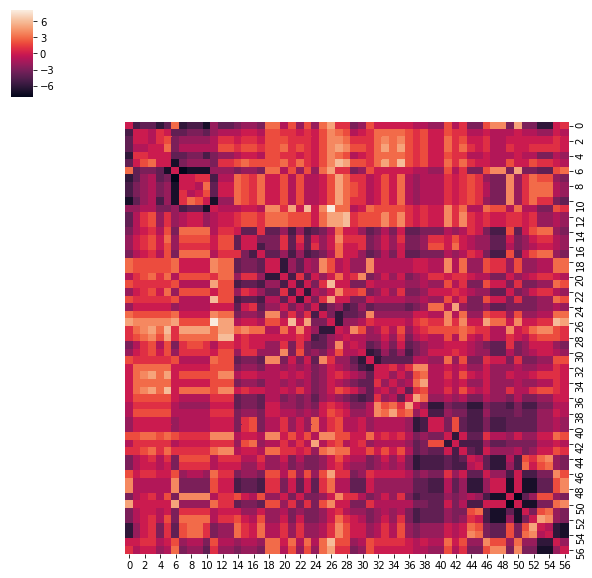

In [21]:
heatClustermap.dendrogramDiff(
    truthJet=truth_jet,
    recluster_jet1=reclusterCA,
    full_path=False, 
    FigName=None)

2019-08-05 12:20:33,728:INFO::(Truth jet - recluster jet1) heat data


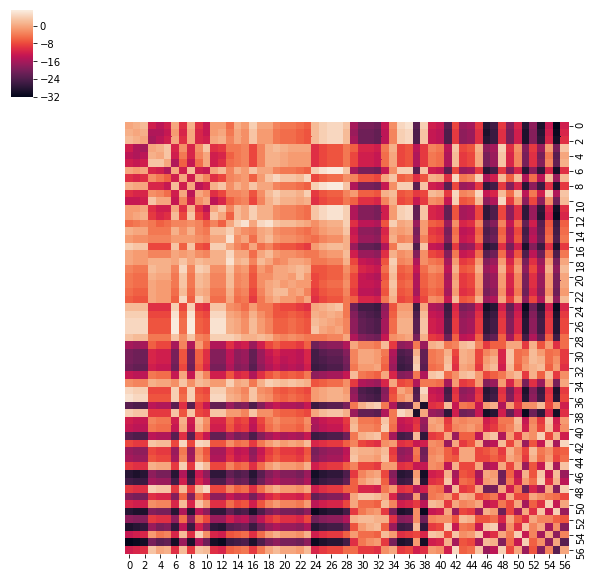

In [22]:
heatClustermap.dendrogramDiff(
    truthJet=truth_jet,
    recluster_jet1=reclusterAntikt,
    full_path=False, 
    FigName=None)

2019-08-05 12:20:34,452:INFO::(recluster jet2 - recluster jet1) heat data


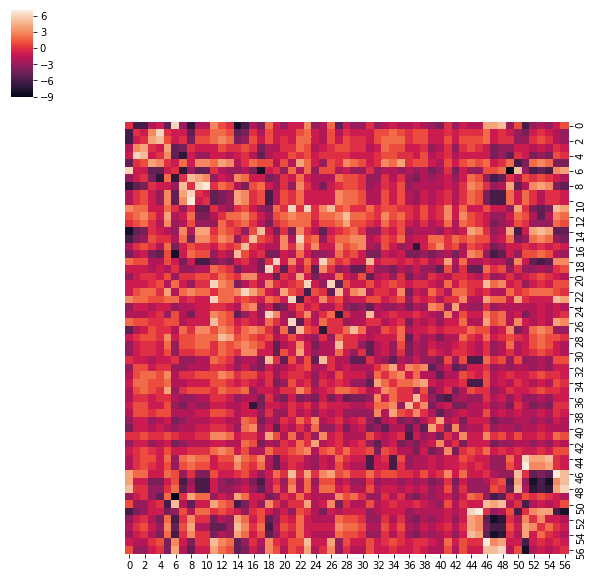

In [23]:
heatClustermap.dendrogramDiff(
    truthJet=None,
    recluster_jet1=reclusterCA,
    recluster_jet2 = reclusterKt,
    full_path=False, 
    FigName=None)

2019-08-05 12:22:19,437:INFO::(recluster jet2 - recluster jet1) heat data


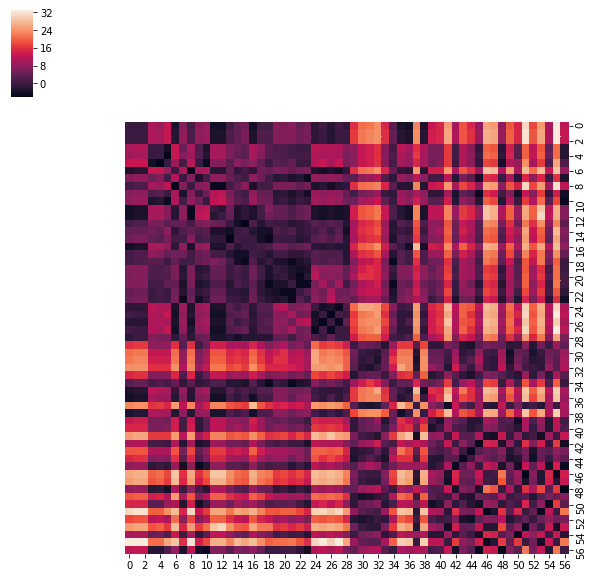

In [25]:
heatClustermap.dendrogramDiff(
    truthJet=None,
    recluster_jet1=reclusterKt,
    recluster_jet2 = reclusterAntikt,
    full_path=False, 
    FigName=None)